In [18]:
import sys
sys.path.append("..")
import torch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,1]
torch.manual_seed(0)

from engression import engression
from simulator import binary_simulator, thresholder

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
x, y = binary_simulator("cubic", n=10000, x_lower=0, x_upper=1, noise_std=0.05, train=True, device=device)
x_eval, y_eval_med, y_eval_mean = binary_simulator("cubic", n=1000, x_lower=0, x_upper=1, noise_std=0.05, train=False, device=device)


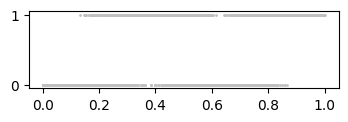

In [21]:
plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")

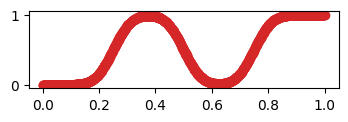

In [22]:
plt.scatter(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")

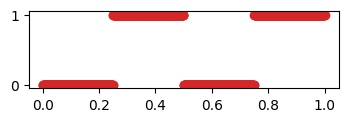

In [23]:
plt.scatter(x_eval.cpu(), y_eval_med.cpu(), label="true median", color="C3")

In [24]:

# Fit an engression model
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.6191,  E(|Y-Yhat|): 1.1491,  E(|Yhat-Yhat'|): 1.0600
[Epoch 100 (20%), batch 9] energy-loss: 0.4746,  E(|Y-Yhat|): 0.9482,  E(|Yhat-Yhat'|): 0.9473
[Epoch 200 (40%), batch 9] energy-loss: 0.4029,  E(|Y-Yhat|): 0.8393,  E(|Yhat-Yhat'|): 0.8728
[Epoch 300 (60%), batch 9] energy-loss: 0.3469,  E(|Y-Yhat|): 0.7040,  E(|Yhat-Yhat'|): 0.7141
[Epoch 400 (80%), batch 9] energy-loss: 0.3080,  E(|Y-Yhat|): 0.6121,  E(|Yhat-Yhat'|): 0.6082
[Epoch 500 (100%), batch 9] energy-loss: 0.2815,  E(|Y-Yhat|): 0.5792,  E(|Yhat-Yhat'|): 0.5954

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1367,  E(|Y-Yhat|): 0.2892,  E(|Yhat-Yhat'|): 0.3049

Predictio

In [25]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 0.14, 
	E(|Y-Yhat|): 0.29, 
	E(|Yhat-Yhat'|): 0.30


In [26]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))


L2 loss: 0.009396946057677269
correlation between predicted and true means: 0.9708878397941589


In [28]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

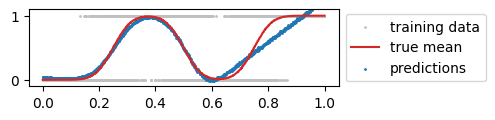

In [30]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()

In [32]:
y

tensor([[1.],
        [1.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [33]:
y_onehot = torch.nn.functional.one_hot(y.long().squeeze(), num_classes=2)
print(y_onehot)

tensor([[0, 1],
        [0, 1],
        [1, 0],
        ...,
        [0, 1],
        [1, 0],
        [0, 1]])


In [34]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device, classification=True)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.3695,  E(|Y-Yhat|): 0.4883,  E(|Yhat-Yhat'|): 0.2375
[Epoch 100 (20%), batch 9] energy-loss: 0.2034,  E(|Y-Yhat|): 0.4159,  E(|Yhat-Yhat'|): 0.4250
[Epoch 200 (40%), batch 9] energy-loss: 0.2089,  E(|Y-Yhat|): 0.4275,  E(|Yhat-Yhat'|): 0.4373
[Epoch 300 (60%), batch 9] energy-loss: 0.1046,  E(|Y-Yhat|): 0.2281,  E(|Yhat-Yhat'|): 0.2471
[Epoch 400 (80%), batch 9] energy-loss: 0.0887,  E(|Y-Yhat|): 0.1884,  E(|Yhat-Yhat'|): 0.1993
[Epoch 500 (100%), batch 9] energy-loss: 0.0877,  E(|Y-Yhat|): 0.1788,  E(|Yhat-Yhat'|): 0.1821

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.0847,  E(|Y-Yhat|): 0.1760,  E(|Yhat-Yhat'|): 0.1827

Predictio

In [35]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 0.08, 
	E(|Y-Yhat|): 0.18, 
	E(|Yhat-Yhat'|): 0.18


In [36]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))


L2 loss: 0.0010801423341035843
correlation between predicted and true means: 0.9970585107803345


In [37]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

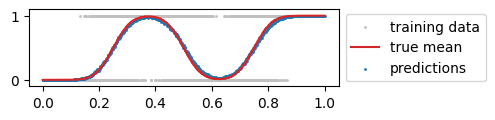

In [38]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()

In [39]:
# Fit an engression model
engressor = engression(x, y_onehot, lr=0.005, num_epochs=500, batch_size=1000, device=device, classification=True)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.4687,  E(|Y-Yhat|): 0.6760,  E(|Yhat-Yhat'|): 0.4146
[Epoch 100 (20%), batch 9] energy-loss: 0.3022,  E(|Y-Yhat|): 0.6018,  E(|Yhat-Yhat'|): 0.5990
[Epoch 200 (40%), batch 9] energy-loss: 0.2952,  E(|Y-Yhat|): 0.5971,  E(|Yhat-Yhat'|): 0.6038
[Epoch 300 (60%), batch 9] energy-loss: 0.2702,  E(|Y-Yhat|): 0.5796,  E(|Yhat-Yhat'|): 0.6188
[Epoch 400 (80%), batch 9] energy-loss: 0.1191,  E(|Y-Yhat|): 0.2640,  E(|Yhat-Yhat'|): 0.2898
[Epoch 500 (100%), batch 9] energy-loss: 0.1199,  E(|Y-Yhat|): 0.2535,  E(|Yhat-Yhat'|): 0.2672

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1227,  E(|Y-Yhat|): 0.2535,  E(|Yhat-Yhat'|): 0.2617

Predictio

In [40]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

In [45]:
y_pred[:,1]

tensor([8.6677e-09, 1.3962e-08, 2.0567e-08, 6.8695e-11, 1.3456e-09, 6.0308e-09,
        5.3258e-09, 1.0441e-08, 2.8595e-08, 3.1894e-08, 2.1549e-06, 3.7519e-08,
        3.6483e-07, 1.2568e-07, 9.0917e-08, 9.3230e-07, 3.8068e-08, 2.8005e-07,
        2.3896e-08, 4.4685e-09, 7.4316e-09, 9.9361e-08, 1.5309e-05, 1.5397e-08,
        2.3050e-08, 4.0166e-07, 2.1482e-08, 2.5539e-08, 2.1236e-08, 1.0808e-07,
        7.0218e-08, 1.2853e-06, 8.4142e-07, 2.4273e-05, 1.2998e-04, 3.7094e-07,
        6.1561e-06, 2.2850e-06, 3.2457e-07, 4.9874e-06, 2.0572e-06, 1.8138e-06,
        8.0708e-07, 4.3284e-05, 7.2411e-06, 9.0558e-07, 3.8075e-05, 9.3237e-05,
        7.4184e-06, 1.8771e-06, 4.5012e-05, 7.7282e-07, 1.3909e-04, 5.5849e-05,
        9.0586e-06, 3.8647e-05, 1.6045e-06, 8.5210e-04, 7.6194e-06, 5.3603e-06,
        2.0521e-05, 1.5165e-05, 5.6068e-04, 6.9072e-04, 1.9140e-05, 3.2369e-04,
        3.0782e-06, 4.2693e-04, 4.8640e-05, 4.6159e-04, 6.4973e-04, 2.9999e-05,
        9.2586e-04, 7.7183e-04, 7.9458e-

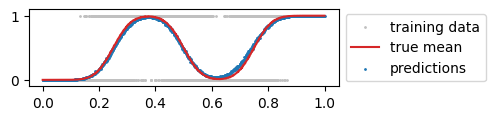

In [46]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred[:,1].cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()